# 텍스트 분류

텍스트 분류란 자연어 처리 기술을 활용해 글의 정보를 추출해서 문제에 맞게 사람이 정한 범주로 분류하는 문제다.
텍스트 분류의 방법과 예시 등 자세한 내용은 이미 2장에서 알아봤다.
이번 장에서는 실제로 데이터셋을 가지고 텍스트 분류를 실습해면서 영어 텍스트 분류와 한글 텍스트 분류에 대해 알아보겠다.
한글 텍스트 분류와 영어 텍스트 분류의 경우 자연어 처리 기술을 통해 언어를 처리하는 과정이 각 언어의 특성에 따라 다르기 때문에 언어마다 각각 따로 알아볼 예정이다.

2장에서 본 것처럼 텍스트 분류에는 여러 활용 사례가 있다.
그중에서 이번 장에서는 감정 분류 문제를 다루겠다.
이를 위해 주어진 글을 분석한 후 감정을 긍정 혹은 부정으로 예측하는 모델을 만들 예정이다.
정확히 얘기하면 영화 리뷰 데이터를 여러 모델을 사용해 학습한 뒤 해당 모델을 통해 새로운 리뷰가 긍정적인 리뷰인지 부정적인 리뷰인지 예측하게 할 것이다.
여기서는 긍정 혹은 부정으로만 구분해서 분류할 예정이지만 다른 문제에서는 중립의 감정이 들어가는 경우도 있고,
긍정과 부정의 경우도 정도에 따라 더 세분화되어 나눠질 수 있다.

실습은 한글과 영어 텍스트를 나눠서 진행할 예정이다.
먼저 4.1절에 영어로 작성된 영화 리뷰 데이터를 분류하는 방법을 먼저 알아보고, 4.2절에서 한글 리뷰 데이터를 분류하겠다.
영어 텍스트 분류를 먼저 하는 이유는 한글에 비해 영어가 데이터와 공부할 수 있는 자료가 많아서 한글로 쓰여진 문서에 비해 접근성이 좋은 편이기 때문이다.
그리고 언어의 특성상 국어는 띄어쓰기를 기준으로 모든 단어를 처리할 수 없다는 점에서 어려움이 있다.
따라서 좀 더 쉽고 데이터가 많은 영어 텍스트 분류를 먼저 해서 텍스트 분류에 대한 감각을 키운 다음 한글 텍스트 분류에 도전해보겠다.

## 영어 텍스트 분류

|||
|-|-|
|데이터 이름|Bag of Words Meets Bags of Popcorn|
|데이터 용도|텍스트 분류 학습을 목적으로 사용한다.|
|데이터 권한|MIT 권한을 가지고 있으나 캐글에 가입한 후 사용하길 권장한다.|
|데이터 출처|https://www.kaggle.com/c/word2vec-nlp-tutorial/data|

이번 절에서는 영화 리뷰 데이터를 분류하겠다.
우리가 접할 수 있는 영화 리뷰 분류 문제들이 많은데, 그중에서 이 책에서는 캐글 대회를 활용해 실습할 예징이다.
2장에서 소개한 것처럼 데이터를 활용한 여러 문제가 있고 참고할 만한 자료가 풍부해서 공부하기에 적합하다.

여기서는 'Bag of Words Meets Bags of Popcorn'이라는 문제를 활용해 실습해 보겠다.
캐글 홈페이지에서 대회로 들어가서 검색하면 이 문제에 접근할 수 있다.
아니면 [여기](https://www.kaggle.com/c/word2vec-nlp-tutorial)로 가보자.

캐글 사용법에 대한 자세한 설명은 앞에서 설명돼 있으니 참고하시길.

### 문제 소개

이번 절에서는 영어 텍스트 분류 문제 중 캐글의 대회인 워드 팝콘 문제를 활용할 것이다.
이 문제를 해결하면서 텍스트 분류 기술을 알아보겠다.
먼저 워드 팝콘이 어떤 문제인지 알아보자.

#### 워드 팝콘

워크 팝콘은 인터넷 영화 데이터베이스에서 나온 영화 평점 데이터를 활용한 캐글 문제다.
영화 평점 데이터이므로 각 데이터는 영화 리뷰 텍스트와 평점에 따른 감정 값으로 구성돼 있다.
이 데이터는 보통 감정 분석 문제에서 자주 활용된다.
그럼 이 데이터를 어떻게 분류할지에 대한 목표를 알아보자.

#### 목표

여기서는 크게 3가지 과정을 거칠 것이다.
첫 번째는 데이터를 불러오는 것과 정제되지 않은 데이터를 활용하기 쉽게 전처리하는 과정이다.
그다음은 데이터를 분석하는 과정이다.
3장에서 데이터를 분석하는 과정이 다른 여타 과정보다 중요하다는 것을 확인했다.
따라서 데이터가 어떻게 구성돼 있는지 확인하고 그에 따라 어떻게 문제를 풀어가야 할지 알아보겠다.
마지막으로 실제로 문제를 해결하기 위해 알고리즘을 모델링하는 과정을 밟을 것이다.
이때 한 가지 방법으로만 하는 것이 아니라 여러 방법을 직접 구현해보고 결과를 비교하면서 어떤 방법이 좋을지에 대해서도 알아본다.

이제 직접 데이터를 확인해보고 정제되지 않은 데이터를 전처리해보자.

### 데이터 분석 및 전처리

이번에 사용할 영화 리뷰 데이터는 텍스트 분류에서 가장 기본적으로 사용되는 데이터로,
여기서는 이 데이터를 분류할 수 있는 모델을 학습시킬 것이다.
모델을 학습시키기 전에 데이터를 전처리하는 과정을 거쳐야 한다.
전처리는 데이터를 모델에 적용하기에 적합하도록 데이터를 정제하는 과정이다.
그전에 데이터를 불러오고 분석하는 과정을 선행할 것이다.
데이터 분석은 앞 장에서 알아본 탐색적 데이터 분석 과정으로, 전처리 전에 데이터에 대해 자세하게 알아본다.

정리하자면 우선 데이터를 불러온 후 데이터 분석 과정을 거치고 나서 그 분석 결과를 바탕으로 전처리 작업을 할 것이다.

<img src="워드팝콘처리과정.png" alt="워드팝콘처리과정" style="width: 500px;"/>

위 그림에 나온 순서대로 데이터 분석 및 전처리를 진행하겠다.
데이터를 불러온 후 데이터를 분석하고 다양한 전처리 과정을 거쳐서 모델에 적용할 것이다.
우선 데이터를 불러오자.

#### 데이터 불러오기 및 분석

먼저 데이터를 캐글에서 가져오자.
캐글 대회 중 'Bag of Words Meets Bags of Popcorn' 문제의 데이터를 받아오자.

In [1]:
import zipfile

DATA_IN_PATH = './data_in/'

file_list = ['labeledTrainData.tsv.zip', 'unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [2]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data = pd.read_csv( DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


데이터는 "id", "sentiment", "review"로 구분돼 있으며, 각 리뷰에 대한 감정이 긍정(1) 혹은 부정(0)인지 나와 있다.
이제 본젹적으로 해당 데이터를 분석해 보자.
데이터 분석은 다음과 같은 순서로 진행할 것이다.

- 데이터 크기
- 데이터 개수
- 각 리부의 문자 길이 분포
- 많이 사용된 단어
- 긍정, 부정 데이터의 분포
- 각 리뷰의 단어 개수 분포
- 특수문자 및 대문자, 소문자 비율

우선 데이터의 크기부터 확인해 보자. 데이터의 크기는 다음과 같이 확인한다.

In [4]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


In [5]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 25000


In [6]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

해당 변수에는 각 리뷰의 길이가 담겨 있다.
이 변수를 사용해 히스토그램을 그려보자.

<ipython-input-7-42d39a46e827>:11: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of review')

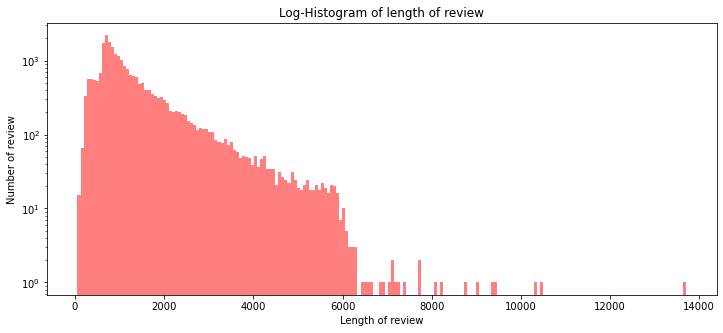

In [7]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

코드를 먼저 살펴보자면. 우선 `figure` 함수를 사용해서 그릴 그래프의 크기를 설정한다.
그리고 `hist` 함수를 사용해 히스토그램을 그리는데, 이때 몇 가지 인자를 설정한다.
그리고 y값의 경우 log의 크기를 가지도록 설정한 후 그래프의 제목, x축, y축의 제목을 설정하면 된다.
그럼 다음과 같이 그려질 것이다.

분포를 보면 각 리뷰의 문자 길이가 대부분 6000자 이하이고 대부분 2000이하에 분포돼 있음을 알 수 있다.
그리고 일부 데이터의 경우 이상치로 10000 이상의 값을 가지고 있다.
길이에 대해 이제 몇가지 통계값을 확인하자.

In [8]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 13710
리뷰 길이 최소 값: 54
리뷰 길이 평균 값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간 값: 983.0
리뷰 길이 제 1 사분위: 705.0
리뷰 길이 제 3 사분위: 1619.0


리뷰의 길이가 히스토그램에서 확인했던 것과 비슷하게 평균이 1300 정도이고, 최댓값이 13000이라는 것을 알 수 있다.
이제 이 갑을 가지고 박스 플롯을 그려보자.

{'whiskers': [<matplotlib.lines.Line2D at 0x149025fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x149030700>,
 'boxes': [<matplotlib.lines.Line2D at 0x149025d30>],
 'medians': [<matplotlib.lines.Line2D at 0x149030e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x149039580>],
 'means': [<matplotlib.lines.Line2D at 0x1490391f0>]}

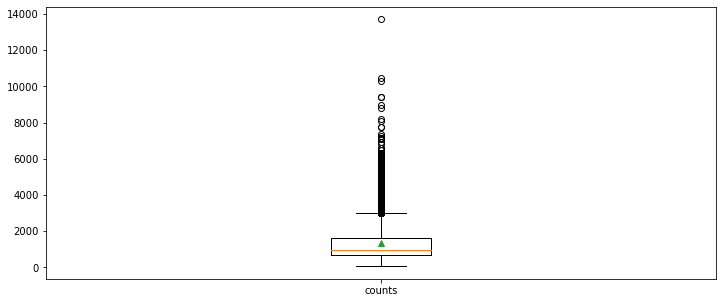

In [9]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

박스 플롯 그래프를 통해 데이터를 살펴보면 우선 데이터의 길이가 대부분 2000 이하로 평균 1500 이하인데,
길이가 4000 이상인 이상치 데이터도 많이 분포돼 있는 것을 확인할 수 있다.

이제 리뷰에서 맣이 사용된 단어로 어떤 것이 있는지 알아보자.
여기서는 워드클라우드 라이브러리를 사용한다.

(-0.5, 799.5, 599.5, -0.5)

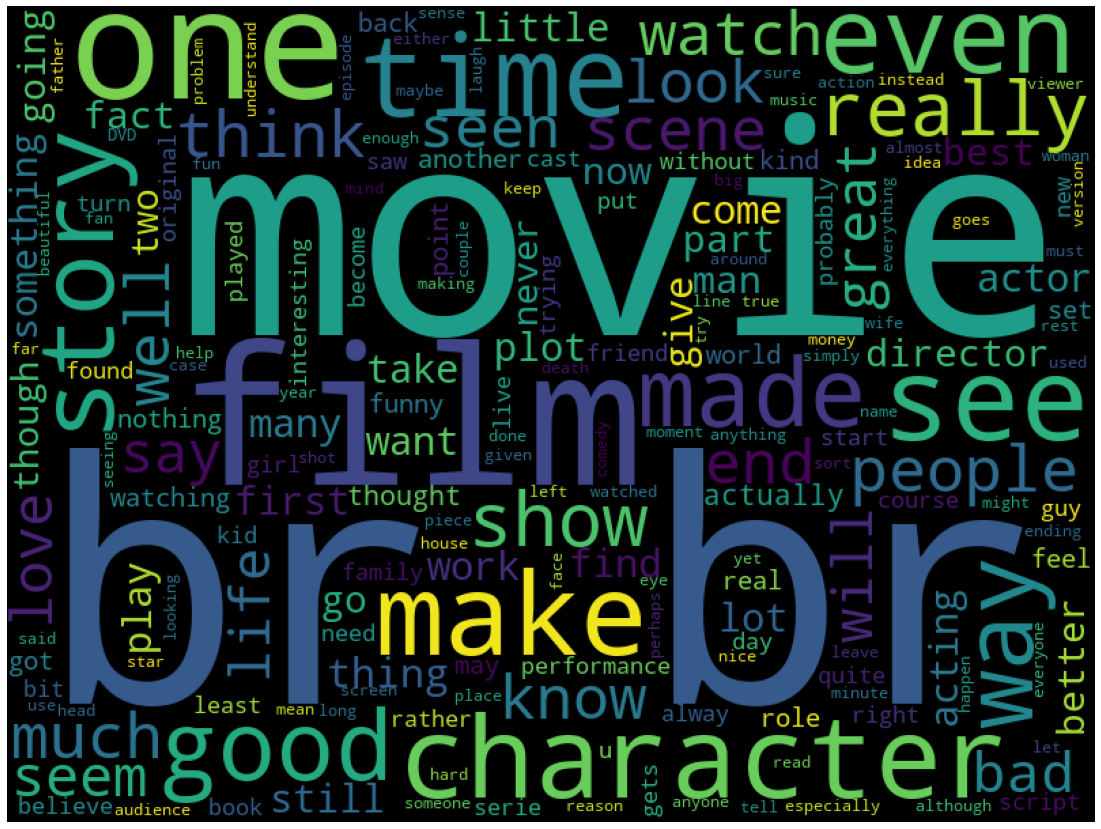

In [10]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

워드클라우드를 통해 그린 그림을 살펴보면 데이터에서 가장 많이 사용된 단어는 br이라는 것을 확인할 수 있다.
br은 HTML 태그 중 하나로, 해당 데이터가 정제되지 않은 인터넷상의 리뷰 형태로 작성돼 있음을 알 수 있다.
이후 전처리 작업에서 이 태그들을 모두 제거하겠다.

이제 각 라벨의 분포를 확인해 본다.
해당 데이터의 경우 긍정과 부정이라는 두 가지 라벨만 가지고 있다.
분포의 경우 또 다른 시각화 도구인 씨본을 사용해 시각화하겠다.

/Users/imgeunseog/miniforge3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

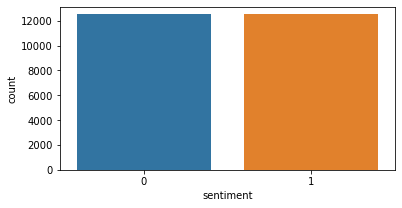

In [11]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])

라벨의 분포 그래프를 보면 거의 동일한 개수로 분포돼 있음을 확인할 수 있다.
각 라벨에 대해 정확한 값을 확인해 보자.

In [12]:
print("긍정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


결과를 보면 정확하게 같은 값을 가진다는 것을 확인할 수 있다.
이제 각 리뷰를 단어 기준으로 나눠서 각 리뷰당 단어의 개수를 확인해 본다.
단어는 띄어쓰기 기준으로 하나의 단어라 생각하고 개수를 계산한다.
우선 각 단어의 길이를 가지는 변수를 하나 설정하자.

In [13]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

<ipython-input-14-85d52b889cc4>:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of reviews')

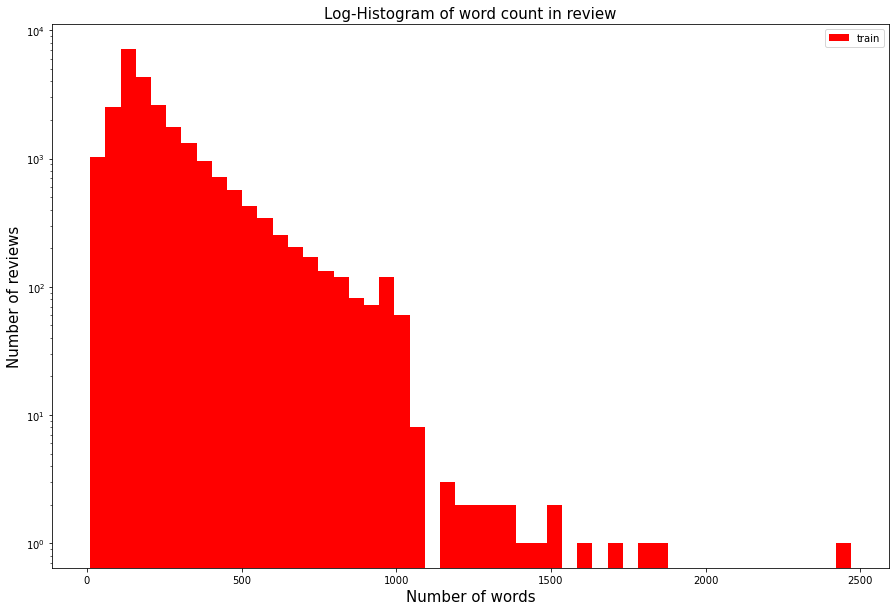

In [14]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

대부분의 단어가 1000개 미만의 단어를 가지고 있고, 대부분 200개 정도의 단어를 가지고 있음을 확인할 수 있다.
앞서 했던 것과 같이 마지막으로 몇 가지 통곗값을 확인해보자.

In [15]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 2470
리뷰 단어 개수 최소 값: 10
리뷰 단어 개수 평균 값: 233.79
리뷰 단어 개수 표준편차: 173.74
리뷰 단어 개수 중간 값: 174.0
리뷰 단어 개수 제 1 사분위: 127.0
리뷰 단어 개수 제 3 사분위: 284.0


단어 개수의 경우 평균이 233개이고, 최댓값의 경우 2,470개의 단어를 가지고 있다.
그리고 3사분위 값이 284개로 리뷰의 75%가 300개 이하의 단어를 가지고 있음을 확인할 수 있다.
마지막으로 각 리뷰에 대해 구두점과 대소문자 비율 값을 확인해보지.

In [16]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫 글자가 대문자 인 질문: 0.00%
대문자가있는 질문: 99.59%
숫자가있는 질문: 56.66%


결과를 보면 대부분 마침표를 포함하고 있고, 대문자도 대부분 사용하고 있다.
따라서 전처리 과정에서 대문자의 경우 모두 소문자로 바꾸고 특수 만자의 경우 제거한다.
이 과정은 학습에 방해가 되는 요소들을 제거하기 위함이다.
이제 분석 결과를 바탕으로 전처리 해보자.

#### 데이터 전처리

이제 데이터를 모델에 적용할 수 있도록 데이터 전처리를 진행했다.
먼저 데이터 전처리 과정에서 사용할 라이브러리들을 불러오자.
분석 과정에서 사용했던 라이브러리도 전처리와 분석 과정을 구분하기 위해 다시 불러온다.

In [17]:
import re
import json
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

먼저 사용할 라이브러리를 살펴보자.
우선 데이터를 다루기 위해 판다스를 사용하고, 데이터를 정제하기 위한 re와 Beauiful Soup을 사용한다.
그리고 불용어를 제거하기 위해 NLTK 라이브러리의 `stopwords` 모듈을 사용한다.
텐서플로의 전처리 모듈인 `pad_sequences`와 `Tokenizer`를 사용하고, 마지막으로 전처리된 데이터를 저장하기 위해 넘파이를 사용한다.

이제 본격적으로 전처리 과정을 진행하는데, 어떤 방향으로 전처리해야 할지 결정하기 위해 데이터 하나를 자세히 확인해 보자.
우선 앞서 분석 과정에서 진행했던 것과 동일하게 학습 데이터를 불러온 후 첫 번째 학습 데이터의 리뷰를 출력해보자.

In [18]:
DATA_IN_PATH = './data_in/'

train_data = pd.read_csv( DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
print(train_data['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

리뷰 데이터를 보면 문장 사이에 '<br/>'과 같은 HTML 태그와 '\\', '...' 같은 특수문자가 포함 된 것을 확인할 수 있다.
문장부호 및 특수문자는 일반적으로 문장의 의미에 크게 영향을 미치지 않기 때문에 최적화된 학습을 위해 제거하자.
Beautiful Soup을 이용해 HTML 태그를 제거하고 `re.sub`를 이용해 특수문자를 제거한다.

In [19]:
review = train_data['review'][0] # 리뷰 중 하나를 가져온다.
review_text = BeautifulSoup(review,"lxml").get_text() # HTML 태그 제거
review_text = re.sub("[^a-zA-Z]", " ", review_text ) # 영어 문자를 제외한 나머지는 모두 공백으로 바꾼다.

Beautiful Soup 라이브러리의 `get_text` 함수를 사용하면 HTML 태그를 제외한 나머지 텍스트만 얻을 수 있다.
그리고 다음으로 `re` 라이브러리의 `sub` 함수를 사용해 영어 알파벳을 제외한 모든 문자, 즉 숫자 및 특수기호를 공백으로 대체한다.
이제 처리한 데이터를 확인해 보자.

In [20]:
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

결과를 보면 HTML 태그와 특수문자가 모두 제거된 것을 확인할 수 있다.
다음으로 진행할 과정은 불용어를 삭제하는 것이다.
불용어란 문장에서 자주 출현하거나 전체적인 의미에 큰 영향을 주지 않는 단어를 말한다.
예를 들어, 영어에서는 조사, 관사 등과 같은 어휘가 있다.
데이터에 따라 불용어를 제거하는 것은 장단점이 있다.
경우에 따라 불용어가 포함된 데이터를 모델링하는 데 있어 노이즈를 줄 수 있는 요인이 될 수 있어 불용어를 제거하는 것이 좋을 수 있다.
그렇지만 데이터가 많고 문장 구문에 대한 전체적인 패턴을 모델링하고자 한다면 이는 역효과를 줄 수도 있다.
이번 절에서는 감정 분석을 하고 있으므로 불용어가 감정 판단에 영향을 주지 않는다고 가정하고 불용어를 제거한다.

불용어를 제거하려면 따로 정의한 불용어 사전을 이용해야 한다.
사용자가 직접 정의할 수도 있지만 고려해야 하는 경우가 너무 많아서 보통 라이브러리에서 일반적으로 정의해놓은 불용어 사전을 이용한다.
여기서는 NLTK의 불용어 사전을 이용한다. 데이터에서 해당 리뷰에 포함된 단어는 모두 제거하면 된다.
그전에 NLTK에서 제공하는 불용어 사전은 전부 소문자 단어로 구성돼 있기 때문에 불용어를 제거하기 위해서는 우선 모든 단어를 소문자로 바꾼 후 불용어를 제거해야 한다.

In [21]:
stop_words = set(stopwords.words('english')) # 영어 불용어들의 set을 만든다.

review_text = review_text.lower()
words = review_text.split() # 소문자 변환 후 단어마다 나눠서 단어 리스트로 만든다.
words = [w for w in words if not w in stop_words] # 불용어 제거한 리스트를 만든다

진행 과정을 보면 우선 리뷰를 `lower` 함수를 사용해 모두 소문자로 바꿨다.
이후 `split` 함수를 사용해 띄어쓰기를 기준으로 텍스트 리뷰를 단어 리스트로 바꾼 후 불용어에 해당하지 않는 단어만 다시 모아서 리스트로 만들었다.
중간에 속도 향상을 위해 `set` 데이터 타입으로 정의한 후 사용했다.

In [22]:
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

하나의 문자열이었던 리뷰가 단어 리스트로 바뀐 것을 확인할 수 있다.
이를 모델에 적용하기 위해서는 다시 하나의 문자열로 합쳐야 한다.
파이썬의 내장 함수인 `join` 함수를 사용하면 간단히 단어들을 하나로 붙여서 문자열로 만들 수 있다.

In [23]:
clean_review = ' '.join(words) # 단어 리스트들을 다시 하나의 글로 합친다.
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

결과를 보면 단어 리스트가 하나의 문자열로 바뀐 것을 확인할 수 있다.
이러한 과정을 전체 데이터에 적용하면 된다.
하지만 이렇게 하나하나 진행한다면 25,000개의 데이터에 대해 모두 적용하는 것은 불가능할 것이다.
따라서 모든 전처리 과정을 하나의 함수로 정의한다.
그러고 나서 이 함수를 이용하면 간단하게 전체 데이터에 적용할 수 있다.
다음과 같이 함수를 정의하자.

In [24]:
def preprocessing( review, remove_stopwords = False ): 
    # 불용어 제거는 옵션으로 선택 가능하다.

    # 1. HTML 태그 제거
    review_text = BeautifulSoup(review, "lxml").get_text()	

    # 2. 영어가 아닌 특수문자들을 공백(" ")으로 바꾸기
    review_text = re.sub("[^a-zA-Z]", " ", review_text)

    # 3. 대문자들을 소문자로 바꾸고 공백단위로 텍스트들 나눠서 리스트로 만든다.
    words = review_text.lower().split()

    if remove_stopwords: 
        # 4. 불용어들을 제거

        #영어에 관련된 불용어 불러오기
        stops = set(stopwords.words("english"))
        # 불용어가 아닌 단어들로 이루어진 새로운 리스트 생성
        words = [w for w in words if not w in stops]
        # 5. 단어 리스트를 공백을 넣어서 하나의 글로 합친다.	
        clean_review = ' '.join(words)

    else: # 불용어 제거하지 않을 때
        clean_review = ' '.join(words)

    return clean_review

함수의 경우 불용어 제거는 인자값으로 받아서 선택할 수 있게 했다.
이제 정의한 함수를 사용해 전체 데이터에 대해 전처리를 진행한 후 전처리된 데이터를 하나 확인해 보자.

In [25]:
clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords = True))

# 전처리한 데이터 출력
clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

이제 두 가지 전처리 과정이 남았다.
우선 전처리한 데이터에서 각 단어를 인덱스로 벡터화해야 한다.
그리고 모델에 따라 입력값의 길이가 동일해야 하기 때문에 일정 길이로 자르고 부족한 부분은 특정값으로 채우는 패딩 과정을 진행해야 한다.
하지만 모델에 따라 각 리뷰가 단어들의 인덱스로 구성된 벡터가 아닌 텍스트로 구성돼야 하는 경우도 있다.
따라서 지금까지 전처리한 데이터를 판다스의 데이터프레임으로 만들어 두고 이후에 전처리 과정을 모두 끝난 후 전처리한 데이터를 저장할 때 함게 저장하게 한다.

In [26]:
clean_train_df = pd.DataFrame({'review': clean_train_reviews, 'sentiment': train_data['sentiment']})

이제 다시 전처리 과정으로 돌아가서 남은 전처리 과정을 진행한다.
앞서 말한 것처럼 모델에 따라 입력값이 텍스트가 아닌 각 단어의 인덱스로 돼 있어야 하고, 동일한 길이여야 하는 경우가 있기 때문에 이 과정들을 진행한다.
여기서는 텐서플로의 전처리 모듈을 사용한다.
우선 앞서 불러왔던 `Tokenizer` 모듈을 생성한 후 정제된 데이터에 적용하고 인덱스로 구성된 벡터로 변환한다.

In [27]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)
print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

결과를 보면 텍스트로 돼 있던 첫 번째 리뷰가 각 단어의 인덱스로 바뀐 것을 볼 수 있다.
이제 전체 데이터가 인덱스로 구성돼 있을 텐데 각 인덱스가 어떤 단어를 의미하는지 확인할 수 있어야 한다.
따라서 이렇게 변환한 경우 단어 사전이 필요하다. 단어 사전을 확인해 보자.

In [28]:
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0
print(word_vocab)

{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78, 'things': 79, 'p

단어 사전의 경우 앞서 정의한 `tokenizer` 객체에서 `word_index` 값을 뽑아보면 사전 형태로 구성돼 있다.
결과를 보면 `movie`라는 단어는 1이고, `film`이라는 단어는 2로 돼 있는 것을 확인할 수 있다.
`word_index`에는 패딩 정보값이 정의돼 있지 않기 때문에 '\<PAD\>'에 대한 인덱스 값을 0으로 입력한다.
그렇다면 전체 데이터에서 사용된 단어 개수는 총 몇 개인지 확인해 보자.

In [29]:
print("전체 단어 개수: ", len(word_vocab))

전체 단어 개수:  74066


단어는 총 74,000개 정도다.
단어 사전뿐 아니라 전체 단어 개수도 이후 모델에서 사용되기 때문에 저장해 둔다.
데이터에 대한 정보인 단어 사전과 전체 단어 개수는 새롭게 딕셔너리 값을 지정해서 저장해두자.

In [30]:
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

이제 마지막 전처리 과정만 남았다.
현재 각 데이터는 서로 길이가 다른데 이 길이를 하나로 통일해야 이후 모델에 바로 적용할 수 있기 때문에
특정 길이를 최대 길이로 정하고 더 긴 데이터의 경우에는 0 값으로 패딩하는 작업을 진행한다.
이 과정 역시 텐서플로의 전처리 모듈을 사용한다.
패딩 처리를 한 후 데이터의 형태를 출력해 보자.

In [31]:
MAX_SEQUENCE_LENGTH = 174 

train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (25000, 174)


패딩 처리에는 앞서 불러온 `pad_sequences` 함수를 사용한다.
이 함수를 사용할 때는 인자로 패딩을 적용할 데이터, 최대 길이값, 0 값을 데이터 앞에 넣을지 뒤에 넣을지를 설정한다.
여기서는 최대 길이를 174로 설정했는데, 이는 앞서 데이터 분석 과정에서 단어 개수의 통계를 계산했을 때 나왔던 중간값이다.
보통 평균이 아닌 중간값을 사용하는 경우가 많은데, 일부 이상치 데이터가 길이가 지나치게 길면 평균이 급격히 올라갈 수 있기 때문에
적당한 값인 중간값을 사용하는 것이다.
이렇게 패딩 처리를 통해 데이터의 형태가 25,000개의 데이터가 174라는 길이를 동일하게 가지게 되었음을 확인할 수 있다.

이제 마지막으로 학습 시 라벨, 즉 정답을 나타내는 값을 넘파이 배열에 저정한다.
넝파이 배열로 변환하는 이유는 이후 전처리한 데이터를 저장할 때 넘파이 형태로 저장하기 때문이다.

In [32]:
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor:', train_labels.shape)

Shape of label tensor: (25000,)


이렇게 넘파이 배열로 만든 후 라벨의 형태를 확인해 보면 길이가 25,000인 벡터임을 확인할 수 있다.
데이터 하나당 하나의 값을 가지는 형태다.
이렇게 라벨가지 넘파이 배열에 저장하면 모든 전처리 과정이 끝난다.
이제 전처리한 데이터를 모두 저장하기만 하면 끝나는데, 그전에 단어들을 벡터화하고 패딩하는 과정을 그림을 통해 직관적으로 이해해 보자.

<img src="원본 데이터가 벡터화 하는 과정.png" alt="원본 데이터가 벡터화 하는 과정" style="width: 500px" />

그림을 통해 다시 설명하면 우선 원본 텍스트 데이터를 인덱스 벡터로 변환해야 한다.
이러한 변환을 위해 인덱싱 단어 사전을 생성해서 활용한다.
그 후 고정된 길이에 대해 패딩 처리를 한다.
이렇게 되면 각 리뷰가 하나의 벡터로 변환된 것을 확인할 수 있다.

이제 전처리한 데이터를 이후 모델링 과정에서 사용하기 위해 저장하자.
여기서는 다음과 같은 총 4개의 데이터를 저정할 것이다.

- 정제된 텍스트 데이터
- 벡터화한 데이터
- 정답 라벨
- 데이터 정보

텍스트 데이터의 경우 csv 파일로 저장하고, 벡터화한 데이터와 정답 라벨의 경우 넘파이 파일로 저장한다.
마지막 데이터 정보의 경우 딕셔너리 형태이기 때문에 JSON 파일로 저장한다.
우선 경로와 파일명을 설정하고 os 라이브러리를 통해 폴더가 없는 경우 폴더를 생성하자.

In [33]:
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

import os
# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

In [34]:
# 전처리 된 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# 정제된 텍스트를 csv 형태로 저장
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)


# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

각 데이터에 맞게 저장 함수를 사용해서 저장하면 해당 경로에 파일들이 저장된 것을 확인할 수 있다.
이제 전처리 과정이 모두 끝났다.
지금까지 학습 데이터에 대해서만 전처리를 했으므로 평가 데이터에 대해서도 위와 동일한 과정을 진행하면 된다.
다른 점은 평가 데이터의 경우 라벨 값이 없기 때문에 라벨은 따로 저장하지 않아도 되고 데이터 정보인 단어 사전과
단어 개수에 대한 정보도 학습 데이터의 것을 사용하므로 저장하지 않아도 된다는 것이다.
추가로 평가 데이터에 대해 저장해야 하는 값이 있는데 각 리뷰 데이터에 대해 리뷰에 대한 'id' 값을 저장해야 한다.
나머지 부분은 학습 데이터와 동일하게 전처리를 진행한다.

In [35]:
test_data = pd.read_csv(DATA_IN_PATH + "testData.tsv", header=0, delimiter="\t", quoting=3)

clean_test_reviews = []
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords = True))


clean_test_df = pd.DataFrame({'review': clean_test_reviews, 'id': test_data['id']})
test_id = np.array(test_data['id'])

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

평가 데이터를 전처리할 때 한 가지 중요한 점은 토크나이저를 통해 인덱스 벡터로 만들 때 토크나이징 객체로 새롭게 만드는 것이 아니라,
기존에 학습 데이터에 적용한 토크나이저 객체를 사용해야 한다는 것이다.
만약 새롭게 만들 경우 학습 데이터와 평가 데이터에 대한 각 단어들의 인덱스가 달려저서 모델에 정상적으로 적용할 수 없기 때문이다.
이제 평가 데이터를 전처리한 데이터도 위와 동일하게 저장하자.
경로는 이미 지정했으므로 파일명만 새롭게 정의한 후 앞선 과정과 동일하게 저장하자.

In [36]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index = False)

### 모델링 소개

이번 장에서는 데이터를 모델에 적용하기 전에 데이터에 대해 이해하는 탐색전 데이터 분석 과정과 데이터를 효과적으로 모델에 적용하기 위해 데이터를 정제하는 과정인 데이터 전처리 과정을 진행했다.
이번 장에서는 앞의 결과를 통해 나온 전처리된 데이터를 직접 모델에 적용하고 주어진 텍스트에 대해 감정이 긍정인지 부정인지 예측할 수 있는 모델을 만들 것이다.
여기서는 하나의 모델이 아닌 여러 가지 모델을 만들어 비교해볼 것이다.
우선 직접 구현할 모델에 대해 알아보자.

#### 실습할 모델 소개

이번 장에서 다루게 될 감정 분석 모델은 기본적이고 간단한 모델이다.
우선 머신러닝 모델 중에서 선형 회귀 모델과 랜덤 포레스트 모델로 감정 분석을 하는 방법을 이야기한다.
그리고 딥러닝 모델 중에서는 **합성곱 신경망 모델(CNN)** 과 **순환 신경망 모델(RNN)** 에 대해 살펴보겠다.

여기서는 실습을 진행할 때 모델링을 위해 2개의 핵심 라이브러리를 사용한다.
머신러닝 모델에서는 사이킷런을 사용하고, 딥러닝 모델에서는 텐서플로를 사용한다.

### 회귀 모델

딥러닝 모델을 시작하기에 앞서 먼저 간단한 모델을 만들어 보자.
이번 장에서 만들 모델은 로지스틱 회귀 모델이다.
로지스틱 회귀 모델은 주로 이항 분류를 하기 위해 사용되며 분류 문제에서 사용할 수 있는 가장 간단한 모델이다.
로지스틱 회귀는 선형결합을 통해 나온 결과를 토대로 예측하게 된다.
모델을 소개하기에 앞서 선형 회귀 모델에 대해 알아보자

#### 선형 회귀 모델

**선형 회귀 모델은 종속변수와 독립변수 간의 상관관계**를 모델링하는 방법이다.
간단히 말하자면 하나의 선형 방정식으로 표현해 예측할 데이터를 분류하는 모델이라 생각하면 된다.
예를 들어, 데이터가 다음과 같이 주어졌다고 하자.

<img src="데이터분포.png" atl="데이터분포" style="width: 500px;" />

이 데이터를 2개의 범주로 분류해야 한다.
이때 하나의 직선으로 데이터를 구분하면 다음 그림과 같은 직선으로 표현할 수 있다.

<img src="선형회귀모델.jpeg" atl="선형회귀모델" style="width: 500px;" />

선형 회귀 모델을 수식으로 표현하면 다음과 같다.

$$
y = w_1 x_1 + w_2 x_2 +\ ...\ + b
$$

위 수식의 w_1과 w_2, b는 학습하고자 하는 파라미터이고, x_1과 x_2는 입력값이다.
여기서 모델에 입력하는 값은 바로 x_1, x_2 변수에 넣게 된다.
변수 x_1과 x_2에는 주로 단어 또는 문장 표현 벡터를 입력하게 된다.
더불어 변수 x_1이나 x_2로 다루지 않고 벡터로 x로 다루게 된다.

#### 로지스틱 회귀 모델

로지스틱 모델은 선형 모델의 결과값에 로지스틱 함수를 적용해 0 ~ 1 사이의 값을 갖게 해서 확률로 표현한다.
이렇게 나온 결과를 통해 1에 가까우면 정답이 1이라 예측하고 0에 가까울 경우 0으로 예측한다.
이제 로지스틱 모델을 가지고 텍스트 분류를 하자.
여기서는 입력값인 단어를 `word2vec`을 통한 단어 임베딩 벡터로 만드는 방법과 `tf-idf`를 통해 임베딩 벡터로 만드는 방법 두 가지를 모두 사용한다.

### TF-IDF를 활용한 모델 구현

여기서는 3장에서는 배울 단어 표현 방법인 TF-IDF를 활용해 문장 벡터를 만든다.
입력값에 대해 TF-IDF 값으로 벡터화를 진행하기 때문에 사이킷런의 `TfidfVectorizer`를 사용한다.
`TfidfVectorizer`를 사용하기 위해서는 입력값이 텍스트로 이뤄진 데이터 형태여야 한다.
따라서 전처리한 결과 중 넘파이 배열이 아닌 정제된 텍스트 데이터를 사용한다.
우선 데이터를 불러오자.

In [37]:
import os

import pandas as pd
import numpy as np

DATA_IN_PATH = './data_in/' 
TRAIN_CLEAN_DATA = 'train_clean.csv'

RANDOM_SEED = 42
TEST_SPLIT = 0.2

train_data = pd.read_csv( DATA_IN_PATH + TRAIN_CLEAN_DATA )

reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

판다스를 이용해 전처리한 텍스트 데이터를 불러온 후 리뷰값과 라벨값을 각각 따로 리스트로 지정해 둔다.
이제 해당 데이터를 활용해 TF-IDF 벡터화를 진행하자.

#### TF-IDF 벡터화

이제 데이터에 대해 TF-IDF 값으로 벡터화를 진행한다.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.0, analyzer="char", sublinear_tf=True, ngram_range=(1,3), max_features=5000) 

X = vectorizer.fit_transform(reviews)
y = np.array(sentiments)

객체를 생성할 때 몇 가지 인자값을 설정하는데 하나씩 살펴보자.
우선 `min_df`는 설정한 값보다 특정 토큰의 `df` 값이 더 적게 나오면 벡터화 과정에서 제거한다는 의미다.
그리고 `analyzer`는 분석하기 위한 기준 단위다.
`word`와 `char`로 2가지 옵션을 제공하는데 `word`의 경우 다넝 하나를 단위로 하는 것이고, `char`는 문자 하나를 단위로 하는 것이다.
여기서는 문자를 단위로 하기 때문에 `char`로 지정한다.
`sublinear_tf` 인자는 문서의 단어 빈도 수에 대한 스무딩 여부를 설정하는 값이다.
`ngram_range`는 빈도의 기본 단위를 어느 범위의 n-gram으로 설정할 것인지를 보는 인자다.
마지막으로 `max_features`의 경우 각 벡터의 최대 길이, 특징의 길이를 설정하는 것이다.

우선 `TfidfVectorizer`를 생성한 후 `fit_transform` 함수를 사용해 전체 문장에 대한 특징 벡터 데이터 X를 생성한다.
TF-IDF로 벡터화한 데이터가 준비되었다.
이제 해당 데이터를 학습 데이터와 검증 데이터로 분리해보자.

#### 학습과 검증 데이터셋 분리

이제 해당 입력값을 모델에 적용하면 되는데 그전에 우선 학습 데이터의 일부를 검증 데이터로 따로 분리한다.

In [39]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
TEST_SPLIT = 0.2

y = np.array(sentiments)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

입력값인 X와 정답 라벨을 넘파이 배열로 만든 y에 대해 적용해서 학습 데이터와 검증 데이터로 나눴다.
비율을 기존 학습 데이터의 20%로 설정해 검증 데이터를 만들었다.
이제 학습 데이터를 모델에 적용해 보자.

#### 모델 선언 및 학습

선형 회귀 모델을 만들기 위해 사이킷런 라이브러리에서 지원하는 `LogisticRegression` 클래스의 객체를 생성하고자 한다.
이후 이 객체의 `fit` 함수를 호출하면 데이터에 대한 모델 학습이 진행된다.

In [40]:
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight='balanced') 
lgs.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

#### 검증 데이터로 성능 평가

검증 데이터를 가지고 학습한 모델에 대해 성능을 확인해 보자.
성능 펴가는 앞서 학습한 객체의 `score` 함수를 이용하면 간단하게 측정할 수 있다.

In [41]:
print("Accuracy: %f" % lgs.score(X_eval, y_eval))

Accuracy: 0.859800


성능 평가 방법으로 여기서는 정확도만 측정했는데, 이 외에도 다양한 성능 평가 지표가 있다.
정밀도, 재현율, f1-score, auc 등 다양한 지표가 있는데, 문제에 따라 성능을 가장 잘 나타내는 지표가 각기 다르므로 다양한 지표에 대해서도 알아두면 좋다.

여기서 평가 성능은 약 86%의 정확도를 보였다.
이 성능은 앞으로 모델을 어떻게 튜닝해서 성능을 높일 수 있는지 볼 수 있는 하나의 기준 지표가 될 수 있다.
성능이 생각보다 나오지 않을 때는 하이퍼파라미터를 수정하거나 다른 기법들을 추가해서 성능을 올려보자.
검증 데이터의 성능이 만족할 만큼 나온다면 평가 데이터를 적용하면 된다.

#### 데이터 제출하기

이제 우리가 만든 모델을 활용해 평가 데이터 결과를 예측하고 캐글에 제출할 수 있도록 저장해보자.
우선 전처리한 텍스트 형태의 평가 데이터르 불러오자.

In [42]:
TEST_CLEAN_DATA = 'test_clean.csv'

test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA)

학습 데이터와 마찬가지로 파일명을 설정한 후 판다스를 통해 데이터프레임 형태로 불러온다.
이제 해당 데이터를 대상으로 이전에 학습 데이터에 대해 사용했던 객체를 사용해 TF-IDF 값으로 벡터화한다.

In [43]:
testDataVecs = vectorizer.transform(test_data['review'])

벡터화할 때 평가 데이터에 대해서는 `fit`을 호출하지 않고 그대로 `transform`만 호출한다.
`fit`의 경우 학습 데이터에 맞게 설정했고, 그 설정에 맞게 평가 데이터로 변화하면 된다.
이제 이 값으로 예측한 후 예측값을 하나의 변수로 할당하고 출력해서 형태를 확인해 보자.

In [44]:
test_predicted = lgs.predict(testDataVecs)
print(test_predicted)

[1 0 1 ... 0 1 0]


결과를 보면 각 데이터에 대해 긍정, 부정 값을 가지고 있다.
이제 이 값을 캐글에 제출하기 위해 데이터프레임 형태로 만들어 CSV 파일로 저장해야 한다.
캐글에 제출하기 위한 데이터 형식은 각 데이터의 고유한 id 값과 결괏값으로 구성돼 있어야 한다.
경로를 지정한 후 데이터프레임을 생성해서 CSV 파일로 만들자.

In [45]:
DATA_OUT_PATH = './data_out/'

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)

answer_dataset = pd.DataFrame({'id': test_data['id'], 'sentiment': test_predicted})
answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_tfidf_answer.csv', index=False, quoting=3)

이렇게 각 데이터의 id 값과 결괏값을 가지는 파일을 데이터프레임으로 만든 후 해당 데이터프레임의 `to_csv` 함수를 사용해 파일로 저장했다.
이제 데이터 파일을 캐글에 제출해 보면 다음과 같이 모델의 성능을 확인할 수 있을 것이다.

#### word2vec을 활용한 모델 구현

이번에는 `word2vec`을 활용해 모델을 구현해 보자.
우선 각 단어에 대해 `word2vec`으로 벡터화해야 한다.
`word2vec`의 경우 단어로 표현된 리스트를 입력값으로 넣어야 하기 때문에 전처리한 넘파이 배열을 사용하지 않는다.
따라서 전처리된 텍스트 데이터를 불러온 후 각 단어들의 리스트로 나눠야 한다.

In [46]:
import pandas as pd

DATA_IN_PATH = './data_in/'
TRAIN_CLEAN_DATA = 'train_clean.csv'

train_data = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA)

reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

sentences = []
for review in reviews:
    sentences.append(review.split())

전처리한 데이터의 경우 각 리뷰가 하나의 문자열로 이뤄져 있다.
하지만 앞서 말했듯이 `word2vec`을 사용하기 위해서는 입력값을 단어로 구분된 리스트로 만들어야 한다.
따라서 위와 같이 전체 리뷰를 단어 리스트로 바꿔야 한다.
각 리뷰를 `split` 함수를 사용해서 띄워쓰기 기준으로 구분한 후 리스트에 하나씩 추가해서 입력값을 만든다.

#### word2vec 벡터화

데이터 전처리가 끝났다면 이제 `word2vec` 모델 학습을 진행해 보자.
우선 진행하기에 앞서 `word2vec` 모델의 하이퍼파라미터를 설정해야 한다.

In [48]:
num_features = 300    
min_word_count = 40   
num_workers = 4       
context = 10          
downsampling = 1e-3

설정한 파라미터에 대한 자세한 내용은 다음과 같다.

- num_features : 각 단어에 대해 임베딩된 벡터의 차원을 정한다.
- min_word_count : 모델에 의미 있는 단어를 가지고 학습되어 위해 적은 빈도 수의 단어들은 학습하지 않는다.
- num_workers : 모델 학습 시 학습을 위한 프로세스 개수를 지정한다.
- context : word2vec을 수행하기 위한 컨텍스트 윈도 크기를 지정한다.
- downsampling : word2vec 학습을 수행할 때 빠른 학습을 위해 정답 단어 라벨에 대한 다운샘플링 비율을 지정한다. 보통 0.001이 좋은 성능을 낸다고 한다.

위 하이퍼파라미터를 가지고 `word2vec`을 학습해보자.
학습에는 `gensim` 라이브러리를 사용할 것이다.
`gensim` 라이브러리가 설치돼 있지 않다면 커맨드 라인에 다음과 같이 입력해서 설치한 후 다음 단계를 진행하자.

`gensim` 라이러리가 설치돼 있다면 이제 `gensim.models`에 있는 `word2vec` 모듈을 불러와서 사용하면 된다.

`word2vec`을 본격적으로 진행하기 전에 `word2vec`을 학습하는 과정에서 진행 상황을 확인해 보기 위해 다음과 같이 `logging`을 이용할 수 있다.

```python
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
```

로깅을 할 때 `fotmat`을 위와 같이 지정하고, 로그 수준은 INFO에 맞추면 `word2vec`의 학습 과정에서 로그 메시지를 양식에 맞게 INFO 수준으로 보여준다.
이제 본격적으로 학습을 실행해 보자.

`word2vec` 학습을 위해서는 `word2vec` 모듈에 있는 `word2vec` 객체를 생성해서 실행한다.
이렇게 학습하고 생성된 객체는 `model` 변수에 할당한다.
이때 학습을 위한 객체의 인자는 입력할 데이터와 하이퍼파라미터를 순서대로 입력해야 원하는 하이퍼파라미터를 사용해 학습할 수 있다.

```python
from gensim.models import word2vec
print("Training model...")
model = word2vec.Word2Vec(
    sentences,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context,
    sample=downsampling
)
```

이렇게 메시지가 나타나고 나면 학습이 완료된다.
`word2vec`으로 학습시킨 모델의 경우 모델을 따로 저장해두면 이후에 다시 사용할 수 있기 때문에 저장해 두고 이후에 학습한 값이 추가로 필요할 경우 사용하면 된다.

```python
model_name = "300features_40minwords_10context"
model.save(model_name)
```

모델을 저장하려면 앞에서 학습한 `model` 객체의 `save` 함수를 사용하면 된다.
여기서 함수의 인자는 모델 이름을 작성해서 입력한다.
저장된 모델은 이미 학습된 것이기 때문에 다른 모델을 사용할 때 불러와서 사용하면 학습 시간 없이 바로 사용할 수 있다.

이제 만들어진 `word2vec` 모델을 활용해 선형 회귀 모델을 학습해보자.
우선 학습을 하기 위해서는 하나의 리뷰를 같은 형태의 입력값으로 만들어야 한다.
지금은 `word2vec` 모델에서 각 단어가 벡터로 표현돼 있다.
그리고 리뷰마다 단어의 개수가 모두 다르기 때문에 입력값을 하나의 형태로 만들어야 한다.
가장 단순한 방법으로는 문장에 있는 모든 단어의 벡터값에 대해 평균을 내서 리뷰 하나당 하나의 벡터로 만드는 방법이 있다.
따라서 여기서는 이 방법을 통해 입력값을 만든다.
다음과 같이 하나의 리뷰에 대해 전체 단어의 평균값을 계산하는 함수를 구현한다.

```python
def get_features(words, num_features):
    feature_vector = np.zeros((num_features), dtype=np.float32)
    
    num_words = 0
    index2word_set = set(model.wv.index2word)
    
    for w in words:
        if w in index2word_set:
            num_words += 1
            feature_vector = np.add(feature_vector, model[w])

    feature_vector = np.divide(feature_vectore, num_words)
    return feature_vector
```

함수에 대해 좀 더 설명하자면 함수의 인자에 대한 설명은 다음과 같다.
 - words : 단어의 모음인 하나의 리뷰가 들어간다.
 - model : word2vec 모델을 넣는 곳이며, 우리가 학습한 word2vec 모델이 들어간다.
 - num_features : word2vec으로 임베딩할 때 정했던 벡터의 차원 수를 뜻한다.

하나의 벡터를 만드는 과정에서 속도를 빠르게 하기 위해 `np.zeros`를 사용해 미리 모두 0의 값을 가지는 벡터를 만든다.
그리고 문장의 단어가 해당 모델 단어사전에 속하는지 보기 위해 `model.wv.index2word`를 set 객체로 생성해서 `index2word_set` 변수에 할당한다.
다음 반복문을 통해 리뷰를 구성하는 단어에 대해 임베딩된 벡터가 있는 단어 벡터의 합을 구한다.
마지막으로 사용한 단어의 전체 개수로 나눔으로써 평균 벡터의 값을 구한다.

이렇게 문장에 특징값을 만들 수 있는 함수를 구현했다면 이제 앞에서 정의한 함수를 사용해 전체 리뷰에 대해 각 리뷰의 평균 벡터를 구하는 함수를 정의한다.

```python
def get_dataset(reviews, model, num_features):
    dataset = list()
    
    for s in reviews:
        dataset.append(get_features(s, model, num_features))

    reviewFeatureVecs = np.stack(dataset)
    return reviewFeatureVecs
```

 - reviews : 학습 데이터인 전체 리뷰 데이터를 입력하는 인자다.
 - model : word2vec 모델을 입력하는 인자다. 위 함수와 같이 앞에서 학습시킨 모델을 넣는다.
 - num_features : word2vec으로 임베딩할 때 정했던 벡터의 차원 수를 뜻한다.

속도 향상을 위해 전체 리뷰에 대한 평균 벡터를 담을 0으로 채워진 넘파이 배열을 미리 만든다.
배열은 2차원으로 만드는데 배열의 행에는 각 문장에 대한 길이를 입력하면 되고 열에는 평균 벡터의 차원 수, 즉 크기를 입력하면 된다.
그리고 각 리뷰에 대해 반복문을 돌면서 각 리뷰에 대해 특징 값을 만든다.

이렇게 get_dataset 함수를 구현하고 나면 이제 전체 리뷰 데이터로 위 함수를 사용해 실제 학습에 사용될 입력값을 만들자.

```python
test_data_vecs = get_dataset(sentences, model, num_features)
```

#### 학습과 검증 데이터셋 분리

만들어진 데이터를 가지고 학습 데이터와 검증 데이터를 나눠보자.
나누는 방식은 앞서 TF-IDF에서 진행했던 방식과 동일하다.

```python
from sklearn.model_selection import train_test_split
import numpy as np

X = test_data_vecs
y = np.array(sentiments)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

x_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)
```

이제 학습 데이터의 일부를 검증 데이터로 분리했다.
이렇게 따로 뽑은 검증 데이터는 이후에 학습 데이터를 통해 학습시킨 모델의 성능을 검증할 때 사용하겠다.
본격적으로 모델을 학습시켜 보자.

#### 모델 선언 및 학습

모델의 경우 TF-IDF 벡터를 사용했을 때와 동일하게 로지스틱 모델을 사용한다.
TF-IDF 모델과 비교하면 입력값을 어떤 특징으로 뽑았는지만 다르고 모두 동일하다.